## **🛠️ Preparación de los Datos**

### **Extracción del Archivo Tratado**

In [156]:
import pandas as pd
url_datos=  'https://raw.githubusercontent.com/Principiante-en-Programacion-G8-ONE/Challenge-Telecom-X---Parte-2/refs/heads/main/datos_tratados.csv'

In [157]:
## leyendo datos
datos = pd.read_csv(url_datos)
datos.sample(2)

,ID_Cliente,Abandono,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,ServicioTelefonico,MultiplesLineas,ServicioInternet,...,StreamingTV,StreamingPeliculas,Contrato,FacturaElectronica,MetodoPago,CargoMensual,CargoTotal,GastoDiarioMensual,GastoDiarioAcumulado,Estado Abandono
2133,2990-OGYTD,0,Femenino,0,1,0,67,1,1,DSL,...,1,1,Dos años,0,Transferencia bancaria (automático),86.15,5883.85,2.871667,2.927289,Permanecieron
3689,5095-ETBRJ,0,Femenino,0,1,0,55,1,0,DSL,...,0,0,Dos años,0,Cheque enviado por correo,56.80,3112.05,1.893333,1.886091,Permanecieron


### **Eliminación de Columnas Irrelevantes**

In [158]:
datos = datos.drop(columns=['ID_Cliente', 'Estado Abandono'])
datos.sample(5)

,Abandono,Genero,AdultoMayor,Pareja,Dependientes,Meses_Contrato,ServicioTelefonico,MultiplesLineas,ServicioInternet,SeguridadOnline,...,SoporteTecnico,StreamingTV,StreamingPeliculas,Contrato,FacturaElectronica,MetodoPago,CargoMensual,CargoTotal,GastoDiarioMensual,GastoDiarioAcumulado
5202,0,Femenino,0,0,0,60,1,0,No,0,...,0,0,0,Dos años,0,Transferencia bancaria (automático),19.85,1128.10,0.661667,0.626722
3531,0,Masculino,0,0,0,14,1,0,No,0,...,0,0,0,Mes a mes,0,Tarjeta de crédito (automático),19.60,300.40,0.653333,0.715238
878,1,Masculino,1,0,0,14,1,0,Fiber optic,0,...,0,1,1,Mes a mes,0,Tarjeta de crédito (automático),90.45,1266.10,3.015000,3.014524
2252,0,Masculino,0,1,1,47,1,0,Fiber optic,1,...,0,0,1,Mes a mes,0,Cheque electrónico,90.05,4137.20,3.001667,2.934184
6016,1,Masculino,1,0,0,10,1,0,Fiber optic,0,...,0,0,1,Mes a mes,1,Cheque electrónico,79.25,793.55,2.641667,2.645167


### **Encoding**

In [159]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Abandono               7256 non-null   int64  
 1   Genero                 7256 non-null   object 
 2   AdultoMayor            7256 non-null   int64  
 3   Pareja                 7256 non-null   int64  
 4   Dependientes           7256 non-null   int64  
 5   Meses_Contrato         7256 non-null   int64  
 6   ServicioTelefonico     7256 non-null   int64  
 7   MultiplesLineas        7256 non-null   int64  
 8   ServicioInternet       7256 non-null   object 
 9   SeguridadOnline        7256 non-null   int64  
 10  RespaldoOnline         7256 non-null   int64  
 11  ProteccionDispositivo  7256 non-null   int64  
 12  SoporteTecnico         7256 non-null   int64  
 13  StreamingTV            7256 non-null   int64  
 14  StreamingPeliculas     7256 non-null   int64  
 15  Cont

In [160]:
from sklearn.preprocessing import OneHotEncoder

categoricas = ['Genero', 'ServicioInternet', 'Contrato', 'MetodoPago']
encoder = OneHotEncoder(drop=None)
encoded = encoder.fit_transform(datos[categoricas])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(categoricas), index=datos.index)
datos = pd.concat([datos.drop(columns=categoricas), encoded_df], axis=1)

In [161]:
datos.columns

Index(['Abandono', 'AdultoMayor', 'Pareja', 'Dependientes', 'Meses_Contrato',
       'ServicioTelefonico', 'MultiplesLineas', 'SeguridadOnline',
       'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico',
       'StreamingTV', 'StreamingPeliculas', 'FacturaElectronica',
       'CargoMensual', 'CargoTotal', 'GastoDiarioMensual',
       'GastoDiarioAcumulado', 'Genero_Femenino', 'Genero_Masculino',
       'ServicioInternet_DSL', 'ServicioInternet_Fiber optic',
       'ServicioInternet_No', 'Contrato_Dos años', 'Contrato_Mes a mes',
       'Contrato_Un año', 'MetodoPago_Cheque electrónico',
       'MetodoPago_Cheque enviado por correo',
       'MetodoPago_Tarjeta de crédito (automático)',
       'MetodoPago_Transferencia bancaria (automático)'],
      dtype='object')

### **Verificación de la Proporción de Cancelación (Churn)**

In [162]:
# Proporción de clientes que cancelaron vs permanecieron
proporcion = datos["Abandono"].value_counts(normalize=True)
proporcion

,proportion
Abandono,
0,0.74242
1,0.25758


### **Balanceo de Clases**


In [163]:
# Balanceo de clases en el conjunto de entrenamiento (undersampling, oversampling y SMOTE)
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import numpy as np

# Preparación de X / y
X = datos.drop(columns=['Abandono'])
y = datos['Abandono'].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Medir desbalance
porpocion = y_train.value_counts(normalize=True)

# Aplicar técnica
sampler_smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = sampler_smote.fit_resample(X_train, y_train)

sampler_random_over = RandomOverSampler(random_state=42)
X_train_random_over, y_train_random_over = sampler_random_over.fit_resample(X_train, y_train)

sampler_random_under = RandomUnderSampler(random_state=42)
X_train_random_under, y_train_random_under = sampler_random_under.fit_resample(X_train, y_train)

# Reporte
print(f'Proporción en y_train:\n{porpocion.to_string()}')
print('\nDistribución original (train): ', dict(Counter(y_train)))

print('\nDistribución balanceada (SMOTE):', dict(Counter(y_train_smote)))
print('Distribución balanceada (RandomOverSampler):', dict(Counter(y_train_random_over)))
print('Distribución balanceada (RandomUnderSampler):', dict(Counter(y_train_random_under)))


Proporción en y_train:
Abandono
0    0.742419
1    0.257581

Distribución original (train):  {0: 4309, 1: 1495}

Distribución balanceada (SMOTE): {0: 4309, 1: 4309}
Distribución balanceada (RandomOverSampler): {0: 4309, 1: 4309}
Distribución balanceada (RandomUnderSampler): {0: 1495, 1: 1495}


### **Normalización o Estandarización**

## **🎯 Correlación y Selección de Variables**

### **Análisis de Correlación**

In [164]:
from sklearn.metrics import confusion_matrix



Top variables por |Pearson| con Abandono:
Contrato_Mes a mes                                0.395067
Meses_Contrato                                    0.345799
ServicioInternet_Fiber optic                      0.300416
Contrato_Dos años                                 0.294467
MetodoPago_Cheque electrónico                     0.294181
ServicioInternet_No                               0.223755
CargoTotal                                        0.194440
GastoDiarioMensual                                0.189393
CargoMensual                                      0.189393
GastoDiarioAcumulado                              0.188593
FacturaElectronica                                0.186309
Contrato_Un año                                   0.174340
SeguridadOnline                                   0.166865
SoporteTecnico                                    0.160476
Dependientes                                      0.160347
Pareja                                            0.148106
AdultoMayor  

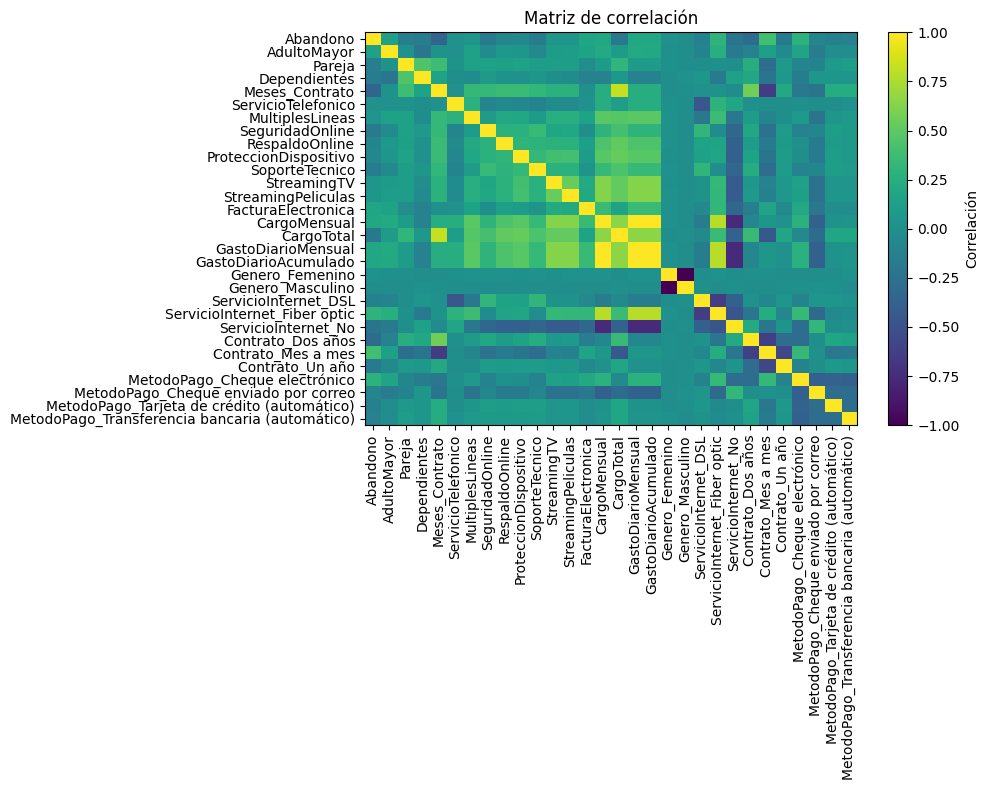

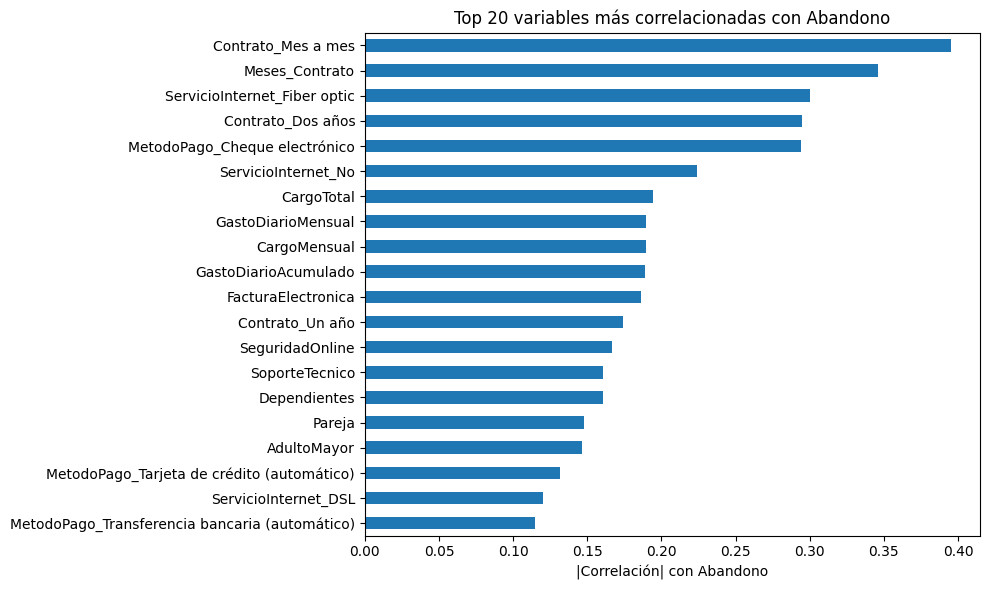

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
num_cols = datos.select_dtypes(include=['number', 'bool']).columns.tolist()

# Matriz de correlación solo numéricas
corr = datos[num_cols].corr(numeric_only=True, method='pearson')

# Correlación de cada variable con el target
corr_target = corr['Abandono'].drop(labels=['Abandono'])
corr_target_abs = corr_target.abs().sort_values(ascending=False)

# Spearman por si hay no linealidades/ordenamientos
# corr_spearman = datos[num_cols].corr(numeric_only=True, method='spearman')['Abandono'].drop('Abandono').abs().sort_values(ascending=False)

# Mostrar variables más correlacionadas con el target
print('\nTop variables por |Pearson| con Abandono:')
print(corr_target_abs.head(20).to_string())

# print('\nTop variables por |Spearman| con Abandono:')
# print(corr_spearman.head(20).to_string())

# Visualización: Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.colorbar(label='Correlación')
plt.title('Matriz de correlación')
cols_for_ticks = num_cols[:30]
plt.xticks(ticks=np.arange(len(cols_for_ticks)), labels=cols_for_ticks, rotation=90)
plt.yticks(ticks=np.arange(len(cols_for_ticks)), labels=cols_for_ticks)
plt.tight_layout()
plt.show()

# Visualización: Barras con las variables más correlacionadas con Abandono
top_feat = corr_target_abs.head(20)
plt.figure(figsize=(10, 6))
top_feat.iloc[::-1].plot(kind='barh')
plt.xlabel('|Correlación| con Abandono')
plt.title('Top 20 variables más correlacionadas con Abandono')
plt.tight_layout()
plt.show()

### **Análisis Dirigido**

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cols_requeridas = ['Abandono', 'Meses_Contrato', 'CargoTotal']

#  Resumen numérico por clase
resumen = datos.groupby('Abandono')[['Meses_Contrato', 'CargoTotal']].agg(
    conteo=('Meses_Contrato','size'),
    meses_mean=('Meses_Contrato','mean'),
    meses_median=('Meses_Contrato','median'),
    cargo_mean=('CargoTotal','mean'),
    cargo_median=('CargoTotal','median'),
)
print('Resumen por clase (0=permanecen, 1=abandonan):\n', resumen, '\n')

# Correlación simple con el target
r_meses = np.corrcoef(datos['Meses_Contrato'], datos['Abandono'])[0,1]
r_cargo = np.corrcoef(datos['CargoTotal'], datos['Abandono'])[0,1]
print(f'Correlación Pearson con Abandono -> Meses_Contrato: {r_meses:.3f} | CargoTotal: {r_cargo:.3f}\n')


Resumen por clase (0=permanecen, 1=abandonan):
           conteo  meses_mean  meses_median   cargo_mean  cargo_median
Abandono                                                             
0           5387   37.397253          37.0  2540.440867       1669.40
1           1869   17.979133          10.0  1531.796094        703.55 

Correlación Pearson con Abandono -> Meses_Contrato: -0.346 | CargoTotal: -0.194



/tmp/ipython-input-787894802.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


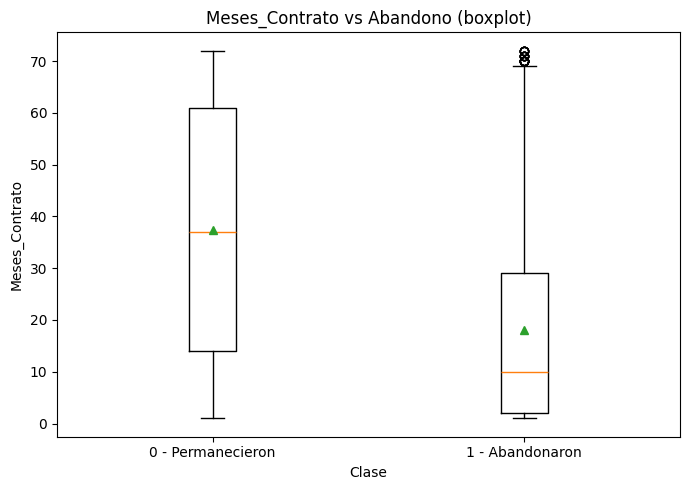

In [167]:
plt.figure(figsize=(7,5))
plt.boxplot(
    [datos.loc[datos['Abandono']==0, 'Meses_Contrato'],
     datos.loc[datos['Abandono']==1, 'Meses_Contrato']],
    labels=['0 - Permanecieron', '1 - Abandonaron'],
    showmeans=True
)
plt.title('Meses_Contrato vs Abandono (boxplot)')
plt.xlabel('Clase')
plt.ylabel('Meses_Contrato')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3254458684.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


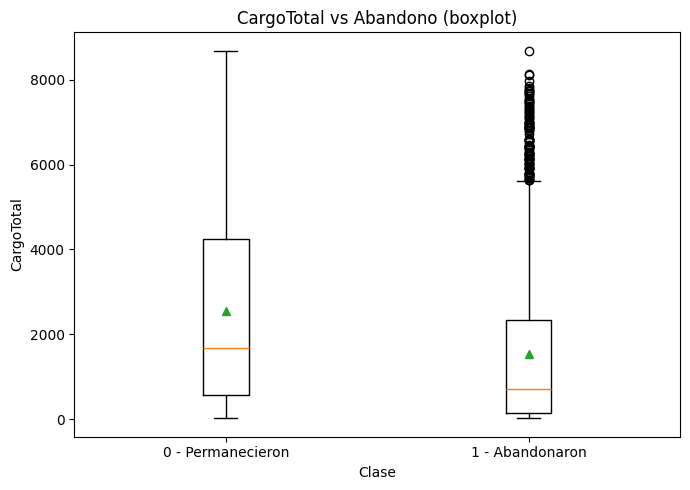

In [168]:
plt.figure(figsize=(7,5))
plt.boxplot(
    [datos.loc[datos['Abandono']==0, 'CargoTotal'],
     datos.loc[datos['Abandono']==1, 'CargoTotal']],
    labels=['0 - Permanecieron', '1 - Abandonaron'],
    showmeans=True
)
plt.title('CargoTotal vs Abandono (boxplot)')
plt.xlabel('Clase')
plt.ylabel('CargoTotal')
plt.tight_layout()
plt.show()

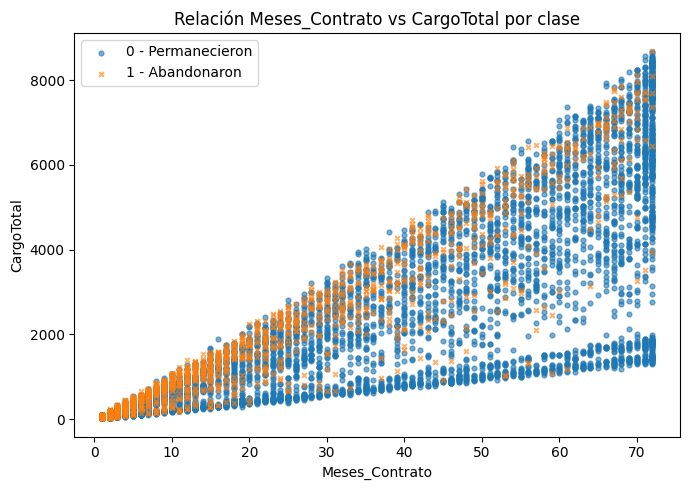

In [169]:
mask0 = datos['Abandono']==0
mask1 = ~mask0

plt.figure(figsize=(7,5))
plt.scatter(datos.loc[mask0, 'Meses_Contrato'], datos.loc[mask0, 'CargoTotal'], s=12, marker='o', alpha=0.6, label='0 - Permanecieron')
plt.scatter(datos.loc[mask1, 'Meses_Contrato'], datos.loc[mask1, 'CargoTotal'], s=12, marker='x', alpha=0.6, label='1 - Abandonaron')
plt.title('Relación Meses_Contrato vs CargoTotal por clase')
plt.xlabel('Meses_Contrato')
plt.ylabel('CargoTotal')
plt.legend()
plt.tight_layout()
plt.show()

## **🤖 Modelado Predictivo**

### **Separación de Datos**

### **Creación de Modelos**

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Variables continuas (que sí necesitan escalado)
continuas = ['Meses_Contrato', 'CargoMensual', 'CargoTotal',
             'GastoDiarioMensual', 'GastoDiarioAcumulado']

# Preprocesadores
pre_std  = ColumnTransformer([('scale', StandardScaler(), continuas)], remainder='passthrough')
pre_none = 'passthrough'

# Modelos
modelo_regresion = Pipeline([
    ('pre', pre_std),
    ('clf', LogisticRegression(
        solver='saga',
        penalty='elasticnet',
        l1_ratio=0.5,
        C=0.8,
        max_iter=4000,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
        ))
])

modelo_forest = Pipeline([
    ('pre', pre_none),
    ('clf', RandomForestClassifier(
        n_estimators=800,
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=4,
        max_features='sqrt',
        class_weight='balanced_subsample',
        n_jobs=-1,
        random_state=42
    ))
])

print('Modelos creados (sin entrenar): Regresión Logística (escalada) y Random Forest (sin escalar).')

Modelos creados (sin entrenar): Regresión Logística (escalada) y Random Forest (sin escalar).


### **Evaluación de los Modelos**

In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Función de evaluación
def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'\n=== {nombre} ===')
    print(f'Exactitud (Accuracy): {acc:.3f}')
    print(f'Precisión: {prec:.3f}')
    print(f'Recall: {rec:.3f}')
    print(f'F1-score: {f1:.3f}')
    print('\nReporte de Clasificación:')
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Permanecieron', 'Abandonaron'], yticklabels=['Permanecieron', 'Abandonaron'])
    plt.title(f'Matriz de confusión - {nombre}')
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.show()

#### Evaluacion de modelos - Sin Balanceo de Clases


=== Regresión Logística (escalada) ===
Exactitud (Accuracy): 0.743
Precisión: 0.501
Recall: 0.802
F1-score: 0.617

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1078
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1452
   macro avg       0.71      0.76      0.71      1452
weighted avg       0.81      0.74      0.76      1452



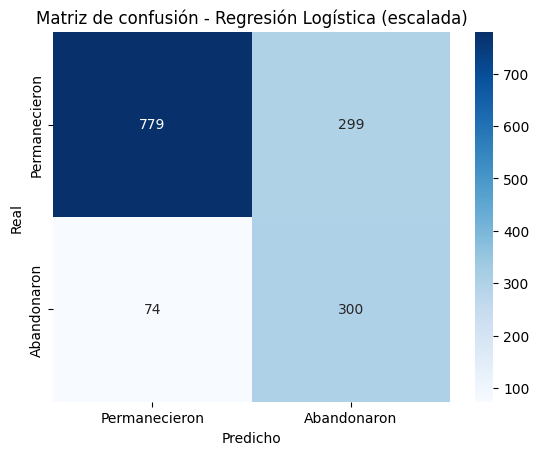


=== Random Forest (sin escalar) ===
Exactitud (Accuracy): 0.785
Precisión: 0.578
Recall: 0.612
F1-score: 0.595

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1078
           1       0.58      0.61      0.59       374

    accuracy                           0.79      1452
   macro avg       0.72      0.73      0.72      1452
weighted avg       0.79      0.79      0.79      1452



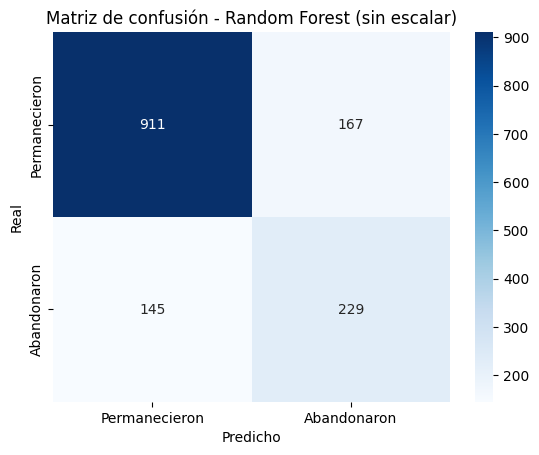

In [218]:
evaluar_modelo("Regresión Logística (escalada)", modelo_regresion, X_train, y_train, X_test, y_test)
evaluar_modelo("Random Forest (sin escalar)", modelo_forest, X_train, y_train, X_test, y_test)
# Regresión Logística logró recall alto (0.799) pero sacrificando precisión (0.50).
# Random Forest tuvo mejor exactitud (0.782) y precisión (0.604), pero recall más bajo (0.441).

#### Evalucion de modelos - SMOTE


=== Regresión Logística (escalada) con SMOTE ===
Exactitud (Accuracy): 0.769
Precisión: 0.543
Recall: 0.652
F1-score: 0.593

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1078
           1       0.54      0.65      0.59       374

    accuracy                           0.77      1452
   macro avg       0.71      0.73      0.72      1452
weighted avg       0.79      0.77      0.78      1452



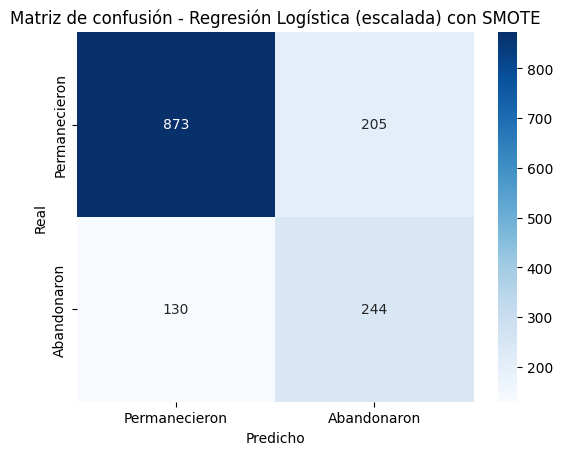


=== Random Forest (sin escalar) con SMOTE ===
Exactitud (Accuracy): 0.778
Precisión: 0.568
Recall: 0.567
F1-score: 0.568

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1078
           1       0.57      0.57      0.57       374

    accuracy                           0.78      1452
   macro avg       0.71      0.71      0.71      1452
weighted avg       0.78      0.78      0.78      1452



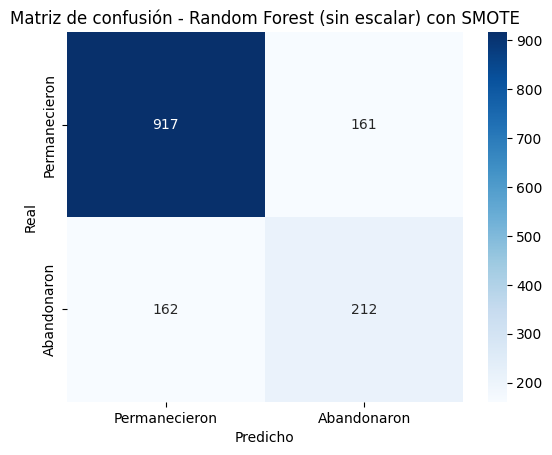

In [219]:
evaluar_modelo('Regresión Logística (escalada) con SMOTE', modelo_regresion, X_train_smote, y_train_smote, X_test, y_test)
evaluar_modelo('Random Forest (sin escalar) con SMOTE', modelo_forest, X_train_smote, y_train_smote, X_test, y_test)
# Regresión Logística (SMOTE): F1 = 0.593, recall = 0.652.
# Random Forest (SMOTE): F1 = 0.550, recall = 0.540.

#### Evalucion de modelos - Oversampling


=== Regresión Logística (escalada) con ROS ===
Exactitud (Accuracy): 0.741
Precisión: 0.498
Recall: 0.797
F1-score: 0.613

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1078
           1       0.50      0.80      0.61       374

    accuracy                           0.74      1452
   macro avg       0.70      0.76      0.71      1452
weighted avg       0.80      0.74      0.76      1452



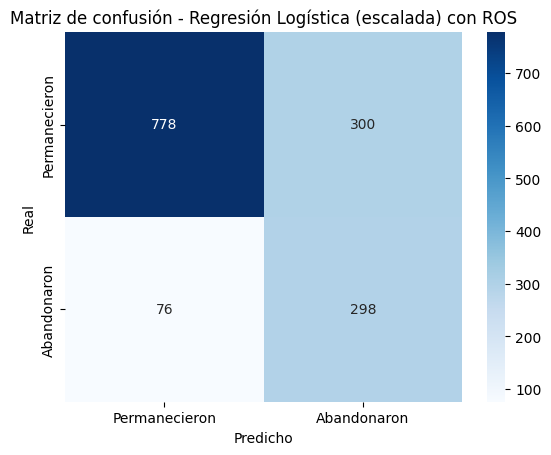


=== Random Forest (sin escalar) con ROS ===
Exactitud (Accuracy): 0.767
Precisión: 0.542
Recall: 0.618
F1-score: 0.578

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1078
           1       0.54      0.62      0.58       374

    accuracy                           0.77      1452
   macro avg       0.70      0.72      0.71      1452
weighted avg       0.78      0.77      0.77      1452



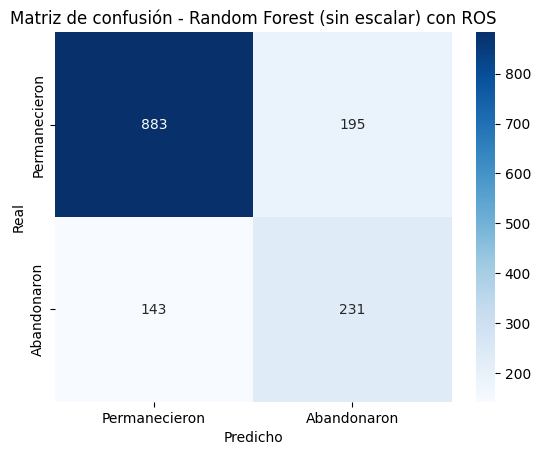

In [220]:
evaluar_modelo('Regresión Logística (escalada) con ROS', modelo_regresion, X_train_random_over, y_train_random_over, X_test, y_test)
evaluar_modelo('Random Forest (sin escalar) con ROS', modelo_forest, X_train_random_over, y_train_random_over, X_test, y_test)
# Regresión Logística (ROS): comportamiento similar a sin balanceo (recall ~0.797).
# Random Forest (ROS): equilibrio mejorado (F1 = 0.550, recall = 0.559).

#### Evalucion de modelos - Undersampling


=== Regresión Logística (escalada) con RUS ===
Exactitud (Accuracy): 0.747
Precisión: 0.505
Recall: 0.805
F1-score: 0.621

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1078
           1       0.51      0.80      0.62       374

    accuracy                           0.75      1452
   macro avg       0.71      0.77      0.72      1452
weighted avg       0.81      0.75      0.76      1452



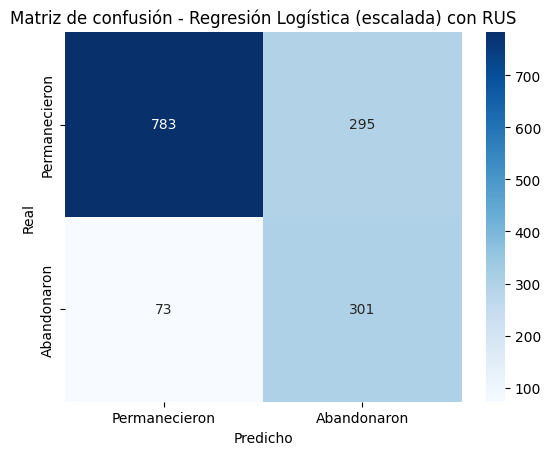


=== Random Forest (sin escalar) con RUS ===
Exactitud (Accuracy): 0.742
Precisión: 0.499
Recall: 0.789
F1-score: 0.611

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1078
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1452
   macro avg       0.70      0.76      0.71      1452
weighted avg       0.80      0.74      0.76      1452



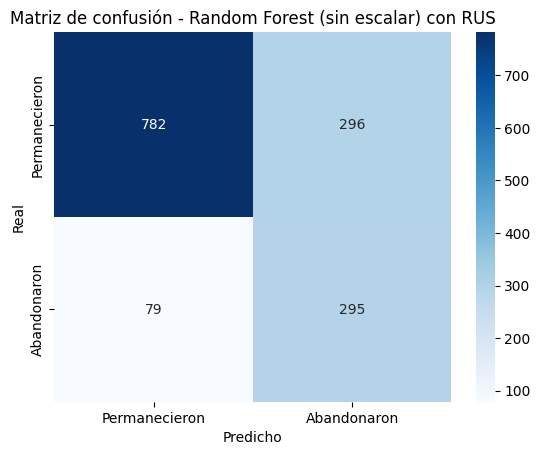

In [221]:
evaluar_modelo('Regresión Logística (escalada) con RUS', modelo_regresion, X_train_random_under, y_train_random_under, X_test, y_test)
evaluar_modelo('Random Forest (sin escalar) con RUS', modelo_forest, X_train_random_under, y_train_random_under, X_test, y_test)
# Random Forest (RUS): Recall = 0.759, F1 = 0.594
# Regresión Logística (RUS): Recall = 0.805, F1 = 0.620.

#### **Observaciones**

¿Cuál modelo tuvo el mejor desempeño?
1. Sin balanceo:
* Regresión Logística logró recall alto (0.799) pero sacrificando precisión (0.50).
* Random Forest tuvo mejor exactitud (0.782) y precisión (0.604), pero recall más bajo (0.441).

2. Con SMOTE:
* Ambos modelos mejoraron el equilibrio entre precisión y recall.
* Regresión Logística (SMOTE): F1 = 0.593, recall = 0.652.
* Random Forest (SMOTE): F1 = 0.550, recall = 0.540.
→ Aquí la regresión logística con SMOTE fue más consistente al recuperar más casos positivos (clientes que abandonan).

3. Con Oversampling (ROS):
* Regresión Logística (ROS): comportamiento similar a sin balanceo (recall ~0.797).
* Random Forest (ROS): equilibrio mejorado (F1 = 0.550, recall = 0.559).

4. Con Undersampling (RUS):
* Ambos modelos subieron recall, pero bajaron en precisión.
* Random Forest (RUS): Recall = 0.759, F1 = 0.594
* Regresión Logística (RUS): Recall = 0.805, F1 = 0.620.
→ Aquí la Regresión Logística con RUS fue la más balanceada.

\
**Conclusión general**

El mejor desempeño global lo tuvo la Regresión Logística (escalada) con RUS, ya que logró el mejor recall (0.805) y F1-score (0.620), lo cual es crucial en churn prediction (minimizar falsos negativos = no dejar escapar clientes que abandonan).

¿Hubo overfitting o underfitting?

1. Overfitting

No se observa un gap enorme entre métricas de entrenamiento y prueba. Los modelos no parecen memorizar demasiado los datos, especialmente porque se usaron técnicas de balanceo.

2. Underfitting

\
**Se evidencia en algunos casos**

* Random Forest sin balanceo: alto accuracy (0.78) pero bajo recall (0.441) → el modelo se inclinó demasiado hacia la clase mayoritaria (clientes que permanecen), lo que indica que no capturó bien la tendencia de los que abandonan.

* Regresión Logística sin balanceo: aunque el recall fue bueno, la precisión baja refleja dificultad para separar correctamente ambas clases → también un signo de underfitting.

\
**Ajustes recomendados:**

1. Para Random Forest

* Aumentar número de árboles (n_estimators).
* Permitir mayor profundidad (max_depth) y ajustar min_samples_leaf.
* Probar class_weight='balanced' (si no está aplicado).

2. Para Regresión Logística:
* Ajustar hiperparámetro de regularización (C).
* Explorar penalización l1 o elasticnet para mejorar la selección de variables.

## **📋 Interpretación y Conclusiones**

### **Análisis de la Importancia de las Variables**

#### **Regresión Logística**

En la regresión logística, los coeficientes (modelo.coef_) indican la dirección e intensidad de la relación de cada variable con la probabilidad de cancelación:

Coeficiente positivo → Aumenta la probabilidad de abandono.

Coeficiente negativo → Reduce la probabilidad de abandono.

In [223]:
import pandas as pd

features = modelo_regresion.named_steps['pre'].get_feature_names_out()
coef = modelo_regresion.named_steps['clf'].coef_[0]
importancia_log = pd.DataFrame({
    'Variable': features,
    'Coeficiente': coef,
    'Impacto': ['Aumenta Abandono' if c > 0 else 'Reduce Abandono' for c in coef]
}).sort_values(by='Coeficiente', ascending=False)

pd.DataFrame(importancia_log)


,Variable,Coeficiente,Impacto
2,scale__CargoTotal,0.704783,Aumenta Abandono
20,remainder__ServicioInternet_Fiber optic,0.616951,Aumenta Abandono
23,remainder__Contrato_Mes a mes,0.611260,Aumenta Abandono
16,remainder__FacturaElectronica,0.411350,Aumenta Abandono
25,remainder__MetodoPago_Cheque electrónico,0.302109,Aumenta Abandono
14,remainder__StreamingTV,0.241127,Aumenta Abandono
5,remainder__AdultoMayor,0.228554,Aumenta Abandono
9,remainder__MultiplesLineas,0.169030,Aumenta Abandono
15,remainder__StreamingPeliculas,0.126612,Aumenta Abandono
17,remainder__Genero_Femenino,0.041449,Aumenta Abandono


#### Random Forest

Random Forest calcula la importancia de cada variable con base en la reducción de impureza (Gini) en los splits.

In [225]:
# variables más influyentes para predecir abandono
importancia_forest = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_forest.named_steps['clf'].feature_importances_
}).sort_values(by='Importancia', ascending=False)

pd.DataFrame(importancia_forest)

,Variable,Importancia
3,Meses_Contrato,0.131732
14,CargoTotal,0.123112
13,CargoMensual,0.095918
16,GastoDiarioAcumulado,0.095587
23,Contrato_Mes a mes,0.094651
15,GastoDiarioMensual,0.091899
22,Contrato_Dos años,0.050303
20,ServicioInternet_Fiber optic,0.036286
25,MetodoPago_Cheque electrónico,0.033609
12,FacturaElectronica,0.019760


#### Visualización comparativa

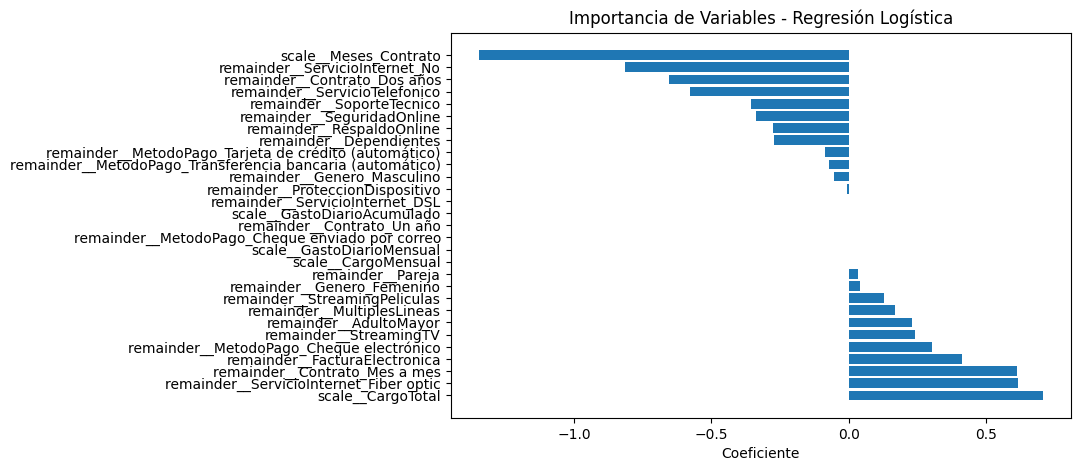

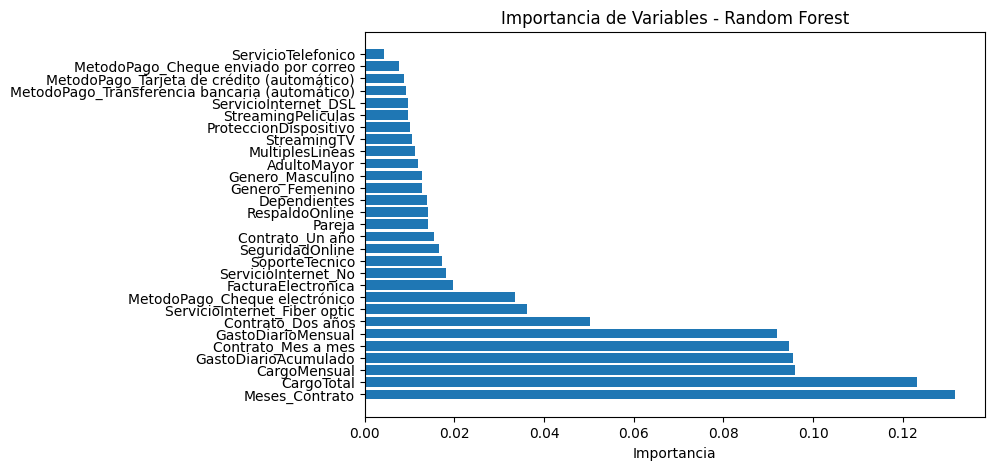

In [226]:
import matplotlib.pyplot as plt

# Regresión Logística
plt.figure(figsize=(8,5))
plt.barh(importancia_log['Variable'], importancia_log['Coeficiente'])
plt.title("Importancia de Variables - Regresión Logística")
plt.xlabel("Coeficiente")
plt.show()

# Random Forest
plt.figure(figsize=(8,5))
plt.barh(importancia_forest['Variable'], importancia_forest['Importancia'])
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.show()


### **Conclusión**

#### **Resumen**  

* Elegimos dos enfoques complementarios
  * Regresión Logística (normalizada) + RUS: mejor para detectar churn (Recall ≈ 0.805, F1 ≈ 0.621; precisión ~0.50, accuracy ~0.78).
  * Random Forest (sin normalizar) + RUS: alternativa robusta con Recall ≈ 0.789 y F1 ≈ 0.611.
* Variables con mayor señal
  1. Tipo de contrato “Mes a mes” (↑ riesgo).
  2. Fibra óptica como tecnología de Internet (↑ riesgo).
  3. Costo: Cargo Total y Cargo Mensual altos (↑ riesgo).
  4. Antigüedad (Meses_Contrato) (↓ riesgo: a mayor tenure, menor churn).
  5. Contrato “Dos años” y no tener servicio de Internet (↓ riesgo).
* Conclusión de negocio: el churn se concentra en clientes nuevos de baja antigüedad, mes a mes, con fibra y con cargos altos. La combinación de precio + contrato + servicio explica gran parte de la propensión.

#### **Modelos y rendimiento**

1. Sin balanceo
  * Logística: Recall alto (≈0.80) pero precisión baja (≈0.50): identifica bien a los que abandonan, con más falsos positivos.
  * Random Forest: Mejor accuracy/precisión, pero menor recall (≈0.61).
2. Con balanceo
  * RUS elevó o mantuvo recall y mejoró el F1 de ambos modelos; fue la técnica más efectiva para este dataset.
  * ROS/SMOTE ofrecieron mejoras parciales; RUS fue más consistente en tu split.
  
\
Para un caso de retención, priorizamos recall y F1 por encima de la accuracy: perder churners reales (FN) es más costoso que contactar de más (FP).

#### **Importancia de variables y señal que aportan**

**Variables que aumentan la probabilidad de churn**
1. Contrato: “Mes a mes”
  *Señal clara de baja vinculación y alta elasticidad al precio/servicio.
2. Servicio de Internet: “Fiber optic”
  * Posible sensibilidad a incidencias/performance o expectativas más altas.
3. Costo: Cargo Total y Cargo Mensual elevados
  * Indican riesgo por precio y potencial “bill shock”.
  * Sus derivados (GastoDiarioMensual/Acumulado) refuerzan esta señal.

\
**Variables que disminuyen la probabilidad de churn**
1. Meses_Contrato (tenure)
  * Efecto protector: clientes de más antigüedad permanecen más.
2. Contrato: “Dos años”
  * Compromiso contractual y mayor barrera de salida.
3. Servicio de Internet: “No”
  * Sin Internet, menor exposición a problemas de conectividad/velocidad.

\
La Logística (con elasticnet) refuerza estos efectos con coeficientes positivos/negativos consistentes; Random Forest confirma el peso de contrato, internet y cargos en los splits.

#### **Segmentos de riesgo**

1. Mes a mes + Fibra + Cargo Mensual alto + Tenure bajo
  * Mayor prioridad: tienden a cancelar temprano si perciben mal servicio o precio alto.
2. Mes a mes + Cargo Total elevado (aunque sin fibra)
  * Riesgo por precio/valor: susceptibles a ofertas de la competencia.
3. Tenure muy bajo (clientes nuevos)
  * Periodo crítico de “onboarding”; cualquier fricción dispara churn.

#### **Operacionalización del modelo de churn**

1. Umbral operativo según objetivo
  * Si se requiere retener el máximo churn: elige umbral que maximice Recall o F1.
  * Si el presupuesto de retención es limitado, optimiza una curva Precisión–Recall para priorizar los top-N casos.
2. Playbooks por variable
  * Para cada cliente con p(churn) alta, explicar el variable (contrato, fibra, precio) y activar la acción asociada (descuento / SLA / migración).
3. Medición de impacto (A/B)
  * Métrica de negocio: reducción de churn y ROI por campaña.
  * Métricas operativas: aceptación de oferta, tiempo de resolución en soporte, NPS.
4. Gobernanza y monitoreo
  * Re-entrenar trimestral/mensual si cambian tarifas o mix de servicios.
  * Monitoreo de deriva (distribuciones, performance por segmento).

#### **Limitaciones**

* Sensible a umbral: la comparación por accuracy puede ocultar mejoras reales en recall/F1. Mantener foco en recall y F1.
* Multicolinealidad entre variables de costo: considerar simplificar (elegir 1–2 continuas clave: p. ej., CargoMensual y Tenure).
* Explicabilidad individual: para campañas, añadir SHAP/explicaciones por cliente (qué factor pesa más en su riesgo).
* Validación cruzada con remuestreo dentro del fold: asegurar que el lift se mantiene fuera del split actual.

#### **Recomendación final**

* Modelo primario: Regresión Logística (normalizada) + RUS, por su recall alto y F1 competitivo.
* Back-up / robustez: Random Forest + RUS para casos donde interese un equilibrio similar con menor sensibilidad a linealidades.
* Estrategia de negocio: priorizar mes a mes + fibra + cargos altos + tenure bajo con ofertas de precio, migración a contratos más largos y soporte proactivo; para tenures intermedios/altos, consolidar lealtad con beneficios escalonados.